In [20]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [27]:
#import tensorflow_datasets.public_api as tfds
#from tfds.image_classification.MNIST import input_data
#from tensorflow.keras.datasets.mnist import input_data

mnist = tf.keras.datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from 'c:\\users\\admin\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [28]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [30]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
random_image = X_train[2342]
random_image.shape

(28, 28)

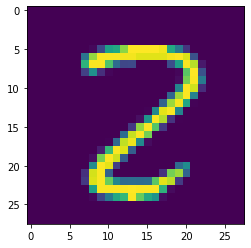

In [33]:
plt.imshow(random_image)
plt.show()

In [44]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[28,28])]

In [48]:
classifier = tf.estimator.DNNClassifier(
    feature_columns = feature_columns,
    hidden_units=[256,32],
    activation_fn = tf.nn.relu,
    optimizer='Adam',
    n_classes=10,
    dropout = 0.1,
    model_dir='./model_dir'    
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {'x':X_train},
    y = Y_train.astype(np.int32),
    num_epochs=None,
    batch_size=50,
    shuffle=True
)

In [50]:
classifier.train(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ./model_dir\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 89.5793, step = 0
INFO:tensorflow:global_step/sec: 228.535
INFO:tensorflow:loss = 1.9248762, step = 100 (0.438 sec)
INFO:tensorflow:global_step/sec: 269.055
INFO:tensorflow:loss = 2.230299, step = 200 (0.372 sec)
INFO:tensorflow:global_step/sec: 273.483
INFO:tensorflow:loss = 1.8416748, step = 300 (0.366 sec)
INFO:tensorflow:global_step/sec: 272.732
INFO:tensorflow:loss = 1.4995807, step = 400 (0.367 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.097926505, step = 7500 (0.438 sec)
INFO:tensorflow:global_step/sec: 233.302
INFO:tensorflow:loss = 0.46836177, step = 7600 (0.429 sec)
INFO:tensorflow:global_step/sec: 229.571
INFO:tensorflow:loss = 0.34919697, step = 7700 (0.436 sec)
INFO:tensorflow:global_step/sec: 236.338
INFO:tensorflow:loss = 0.33517465, step = 7800 (0.423 sec)
INFO:tensorflow:global_step/sec: 223.663
INFO:tensorflow:loss = 0.212365, step = 7900 (0.447 sec)
INFO:tensorflow:global_step/sec: 236.628
INFO:tensorflow:loss = 0.30564454, step = 8000 (0.424 sec)
INFO:tensorflow:global_step/sec: 233.027
INFO:tensorflow:loss = 0.077042274, step = 8100 (0.428 sec)
INFO:tensorflow:global_step/sec: 195.676
INFO:tensorflow:loss = 0.17062615, step = 8200 (0.513 sec)
INFO:tensorflow:global_step/sec: 173.02
INFO:tensorflow:loss = 0.21748161, step = 8300 (0.576 sec)
INFO:tensorflow:global_step/sec: 190.831
INFO:tensorflow:loss = 0.092224486, step = 8400 (0.525 sec)
INFO:tensorflow:global_step/sec: 236.627


In [51]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {'x':X_test},
    y = Y_test.astype(np.int32),
    num_epochs = 1,
    shuffle = False
)

In [52]:
results = classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-02T15:36:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_dir\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69335s
INFO:tensorflow:Finished evaluation at 2021-01-02-15:36:08
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9601, average_loss = 0.17495658, global_step = 10000, loss = 0.17337164
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: ./model_dir\model.ckpt-10000


In [53]:
predict_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {'x':X_test[10:12]},
    y = Y_test[10:12].astype(np.int32),
    num_epochs=1,
    shuffle=False
)

In [54]:
predictions = classifier.predict(input_fn=predict_input_fn)

In [55]:
predictions_list=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_dir\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions_list

[{'logits': array([108.85912 ,  67.545555,  97.88454 ,  74.31953 ,  41.466877,
          92.81885 ,  91.091286,  90.82912 ,  76.36632 ,  73.452614],
        dtype=float32),
  'probabilities': array([9.99982715e-01, 1.14218867e-18, 1.71312931e-05, 9.99162923e-16,
         5.39403174e-30, 1.08090944e-07, 1.92096170e-08, 1.47795154e-08,
         7.73653297e-15, 4.19895143e-16], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
        dtype=object)},
 {'logits': array([ 96.45234 ,  30.4035  ,  69.88806 ,  80.7214  ,  90.78493 ,
          92.908615, 106.02911 ,  42.72515 ,  57.87139 ,  26.924349],
        dtype=float32),
  'probabilities': array([6.9315218e-05, 1.4327937e-33, 2.0142314e-16, 1.0208627e-11,
         2.3960888e-07, 2.0035898e-06, 9.9992847e-01, 3.2166754e-28,
         1.2171268e-21, 4.417

In [57]:
Y_test[10:12]

array([0, 6], dtype=uint8)